### Diagnostic analysis using Python


### Defining the goal:

#### To reduce or eliminating missed appointments to enable the NHS expand its infrastructure and resources to match its increasing population capacity and to budget correctly which would be beneficial financially as well as socially. 

#### Business questions:
##### Has there been adequate staff and capacity in the networks?
##### What was the actual utilisation of resources?



### Set up the Working Environment


In [2]:
import pandas as pd                 #  For data manipulation and analysis.
import numpy as np                  #  For numerical operations.
import matplotlib.pyplot as plt     # For basic plotting and visualizations.
import seaborn as sns               # For more advanced statistical visualizations.
import openpyxl                     # For reading and writing Excel files (.xlsx).
import datetime                     # For working with date and time data.
import warnings                     # To handle and suppress warnings (optional).
import re                           # Regular expressions for text manipulation
import scipy.stats as stats         # For statistical tests and outlier detection


### Downloading data into dataframes

In [3]:
# Loading the CSV and Excel files
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')
tweets = pd.read_csv('tweets.csv')

# Displaying the data (but leaving this as comments)
# print(ad)  # This will display all the rows of the actual_duration dataset
# print(ar)  # This will display all the rows of the appointments_regional dataset
# print(nc)  # This will display all the rows of the national_categories dataset
# print(tweets)  # This will display all the rows of the tweets dataset


In [4]:
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [5]:
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [6]:
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


### Data wrangling
##### 1.Check for missing data in each DataFrame
##### 2.Convert 'appointment_date' to datetime format for the respective DataFrames

In [7]:
# Define a function to check for missing data
def check_missing_data(df):
    return df.isnull().sum()

# Check for missing data in each DataFrame
missing_ad = check_missing_data(ad)
missing_ar = check_missing_data(ar)
missing_nc = check_missing_data(nc)

# Display the missing data counts
print("\nMissing Data for Actual Duration (ad):")
print(missing_ad)

print("\nMissing Data for Appointments Regional (ar):")
print(missing_ar)

print("\nMissing Data for National Categories (nc):")
print(missing_nc)


Missing Data for Actual Duration (ad):
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

Missing Data for Appointments Regional (ar):
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

Missing Data for National Categories (nc):
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


#### This output shows that there are no missing data or null/NaN values in any of the specified columns across the three datasets (ad, ar, nc). This indicates that the data quality is good.

In [8]:
# Convert 'appointment_date' to datetime format for the respective DataFrames
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m', errors='coerce')  # Assuming month is in 'month-year' format

ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y', errors='coerce')
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%d-%b-%y', errors='coerce')

# Get the first and last date for each DataFrame
ar_min_date = ar['appointment_month'].min()
ar_max_date = ar['appointment_month'].max()

ad_min_date = ad['appointment_date'].min()
ad_max_date = ad['appointment_date'].max()

nc_min_date = nc['appointment_date'].min()
nc_max_date = nc['appointment_date'].max()

# Display the results
print(f"Appointments in 'ar' were scheduled between: {ar_min_date} and {ar_max_date}")
print(f"Appointments in 'ad' were scheduled between: {ad_min_date} and {ad_max_date}")
print(f"Appointments in 'nc' were scheduled between: {nc_min_date} and {nc_max_date}")

Appointments in 'ar' were scheduled between: 2020-01-01 00:00:00 and 2022-06-01 00:00:00
Appointments in 'ad' were scheduled between: 2021-12-01 00:00:00 and 2022-06-30 00:00:00
Appointments in 'nc' were scheduled between: 2021-08-01 00:00:00 and 2022-06-30 00:00:00


### Exploratory Data Analysis

In [9]:
# Define a function to check basic info and stats of the DataFrame
def explore_data(df, name):
    """
    This function displays basic information about a DataFrame, including:
    - First few rows of the DataFrame
    - Information about the DataFrame's columns (e.g., data types, non-null counts)
    - Descriptive statistics (e.g., mean, std, min, 25%, 50%, 75%, max)
    
    Parameters:
    df (DataFrame): The pandas DataFrame to explore.
    name (str): The name or description of the dataset to display in the output.
    """
    print(f"Data for {name}:")
    display(df.head())  # Display the first few rows of the DataFrame
    print(f"Info for {name}:")
    display(df.info())  # Display DataFrame info (e.g., column data types, non-null counts)
    print(f"Descriptive Statistics for {name}:")
    display(df.describe())  # Display basic descriptive statistics for numeric columns

# Explore each dataset
explore_data(ad, "Actual Duration (ad)")
explore_data(ar, "Appointments Regional (ar)")
explore_data(nc, "National Categories (nc)")


Data for Actual Duration (ad):


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


Info for Actual Duration (ad):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sub_icb_location_code      137793 non-null  object        
 1   sub_icb_location_ons_code  137793 non-null  object        
 2   sub_icb_location_name      137793 non-null  object        
 3   icb_ons_code               137793 non-null  object        
 4   region_ons_code            137793 non-null  object        
 5   appointment_date           137793 non-null  datetime64[ns]
 6   actual_duration            137793 non-null  object        
 7   count_of_appointments      137793 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 8.4+ MB


None

Descriptive Statistics for Actual Duration (ad):


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


Data for Appointments Regional (ar):


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


Info for Appointments Regional (ar):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB


None

Descriptive Statistics for Appointments Regional (ar):


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


Data for National Categories (nc):


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


Info for National Categories (nc):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


None

Descriptive Statistics for National Categories (nc):


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Observations about the data dispersion

Actual Duration (ad):
Min: 1
Max: 15400
IQR: 25% = 194, 50% = 696, 75% = 1621

2. Appointments Regional (ar):

Min: 1
Max: 211265
IQR: 25% = 7, 50% = 47, 75% = 308

3. National Categories (nc):

Min:1
Max: 16590
IQR: 25% = 7, 50% = 25, 75% = 128



### How many locations are there in the data set?


In [10]:
# Define a function to count unique locations
def count_unique_locations(df):
    '''
      Return the sum of two decimal numbers in binary digits.

            Parameters:
                    a (int): A decimal integer
                    b (int): Another decimal integer

            Returns:
                    binary_sum (str): Binary string of the sum of a and b
    '''
    
    return df['sub_icb_location_name'].nunique()

locations = count_unique_locations(nc)
print(f"Number of locations in the dataset: {locations}")

Number of locations in the dataset: 106


In [11]:
help(count_unique_locations)

Help on function count_unique_locations in module __main__:

count_unique_locations(df)
    Return the sum of two decimal numbers in binary digits.
    
          Parameters:
                  a (int): A decimal integer
                  b (int): Another decimal integer
    
          Returns:
                  binary_sum (str): Binary string of the sum of a and b



###  What are the five locations with the highest number of appointments?



In [12]:
# Define a function to get the top locations with the highest number of appointments
def top_locations_by_appointments(df, top_n=5):
    """
    Function to return the top N locations with the highest number of appointments.
    
    Parameters:
        df (DataFrame): The DataFrame containing appointment data with location names and appointment counts.
        top_n (int): The number of top locations to return (default is 5).
        
    Returns:
        DataFrame: A DataFrame of the top N locations with the highest number of appointments.
    """
    # Group by location and sum the appointments count, then get the top N locations
    top_locations = df.groupby('sub_icb_location_name')['count_of_appointments'].sum().nlargest(top_n)
    return top_locations

# Example usage with your DataFrame 'nc' (replace with your actual DataFrame variable)
top_locations = top_locations_by_appointments(nc)

# Display the result in a neat table
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['Location', 'Number of Appointments']

# Show the result as a table
print("\nTop 5 locations with the highest number of appointments:")
print(top_locations_df)


Top 5 locations with the highest number of appointments:
                                      Location  Number of Appointments
0            NHS North West London ICB - W2U3Z                12142390
1            NHS North East London ICB - A3A8R                 9588891
2                NHS Kent and Medway ICB - 91Q                 9286167
3  NHS Hampshire and Isle Of Wight ICB - D9Y0V                 8288102
4              NHS South East London ICB - 72Q                 7850170


###  How many service settings, context types, national categories, and appointment statuses are there?



In [13]:
# Importing display from IPython for better output visualization
from IPython.display import display

# Define a function to count unique values for specified columns
def count_unique_values(df, column_name):
    """
    Function to count the number of unique values in a specified column of a DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame to analyze.
        column_name (str): The name of the column to count unique values for.
        
    Returns:
        int: The number of unique values in the specified column.
    """
    return df[column_name].nunique()

# Count unique values for each relevant column in the DataFrames
service_settings = count_unique_values(nc, 'service_setting')
context_types = count_unique_values(nc, 'context_type')
national_categories = count_unique_values(nc, 'national_category')
appointment_statuses = count_unique_values(ar, 'appointment_status')

# Display the results of the counts using display()
display(f"Number of service settings: {service_settings}")
display(f"Number of context types: {context_types}")
display(f"Number of national categories: {national_categories}")
display(f"Number of appointment statuses: {appointment_statuses}")

'Number of service settings: 5'

'Number of context types: 3'

'Number of national categories: 18'

'Number of appointment statuses: 3'

In [14]:
# Importing display from IPython for better output visualization
from IPython.display import display

# Define a function to list potentially useful columns for analysis
def useful_columns_for_analysis():
    """
    Function to return a list of potentially useful columns for further data analysis.
    
    Returns:
        list: A list of column names that are considered useful for analysis.
    """
    return [
        "sub_icb_location_name (location)",
        "count_of_appointments (number of appointments)",
        "service_setting (service types)",
        "context_type (appointment context)",
        "appointment_status (appointment status)",
        "national_category (appointment category)"
    ]

# Display the useful columns for further analysis
useful_columns = useful_columns_for_analysis()
display("Potential useful columns for analysis:")  # No newline character here
for column in useful_columns:
    display(column)

'Potential useful columns for analysis:'

'sub_icb_location_name (location)'

'count_of_appointments (number of appointments)'

'service_setting (service types)'

'context_type (appointment context)'

'appointment_status (appointment status)'

'national_category (appointment category)'

### Outlier detection

### Visualising the Data (Boxplot) for a quick visual inspection of potential outliers.

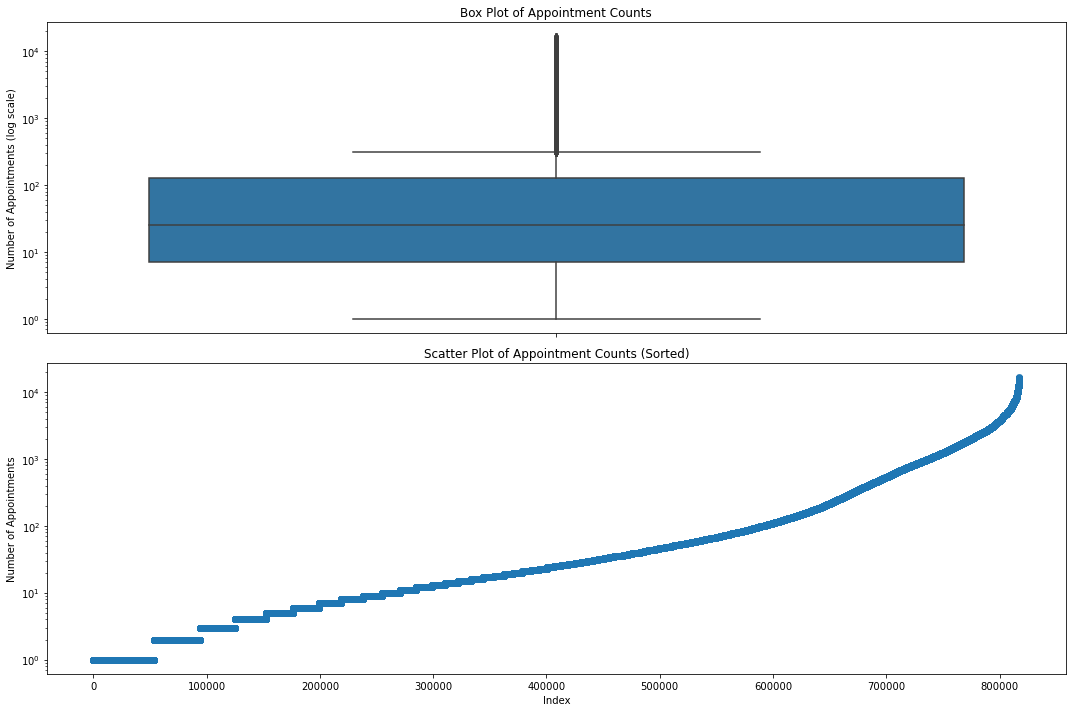

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('national_categories.xlsx')

# Create a figure with two subplots
plt.figure(figsize=(15, 10))

# Box plot
plt.subplot(2, 1, 1)
sns.boxplot(y='count_of_appointments', data=df)
plt.title('Box Plot of Appointment Counts')
plt.yscale('log')  # Using log scale since there might be large variations
plt.ylabel('Number of Appointments (log scale)')

# Scatter plot
plt.subplot(2, 1, 2)
plt.scatter(range(len(df)), sorted(df['count_of_appointments']), alpha=0.5)
plt.title('Scatter Plot of Appointment Counts (Sorted)')
plt.xlabel('Index')
plt.ylabel('Number of Appointments')
plt.yscale('log')

plt.tight_layout()
plt.show()

#### In healthcare data, outliers could represent important real-world events (e.g., exceptional long appointments or regions with rare but critical occurrences). Removing them might mean losing important insights.So I might just ignore for the current analysis. It is good to know the data dispersion, so will leave it at this point.

#### Also the dataset is large, the influence of outliers on analysis might be minimal, especially in summary statistics like the mean or standard deviation, which might not be as sensitive as other methods like the median.

In [16]:
ar_df=ar

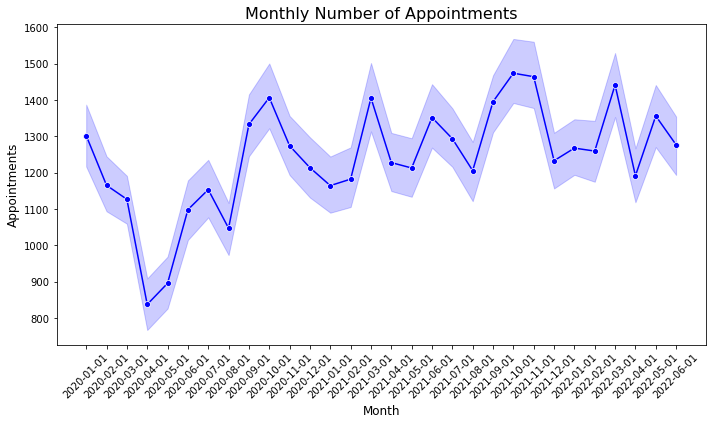

In [17]:
# Ensure 'appointment_month' is treated as a string for better plotting
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

def plot_monthly_appointments(df):
    """
    Plots the number of appointments per month.

    Parameters:
    df (DataFrame): The dataframe containing 'appointment_month' and 'count_of_appointments'.

    Returns:
    None: Displays a line plot showing the number of appointments each month.
    """
    # Plot the number of appointments per month
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='appointment_month', y='count_of_appointments', data=df, marker='o', color='blue')
    
    # Set plot titles and labels
    plt.title('Monthly Number of Appointments', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Appointments', fontsize=12)
    
    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45)
    
    # Adjust layout to avoid overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Call the function to plot the data
plot_monthly_appointments(ar_df)


#### The chart reveals seasonal trends, demand fluctuations, and potential outliers in appointment numbers. It helps identify peak periods, ensuring better resource planning and operational adjustments.

In [18]:
import pandas as pd

# Function to print the columns of a DataFrame
def display_columns(dataframe_name, dataframe):
    """
    Displays the columns of the given DataFrame in a neat tabular format.
    
    Parameters:
    dataframe_name (str): The name of the DataFrame to display columns for.
    dataframe (DataFrame): The DataFrame whose columns need to be displayed.
    """
    print(f"Columns in '{dataframe_name}' DataFrame:")
    print(pd.DataFrame(dataframe.columns, columns=["Column Name"]))
    print("\n")

# Display columns for 'ar', 'ad', and 'nc' DataFrames
display_columns('ar', ar)
display_columns('ad', ad)
display_columns('nc', nc)


Columns in 'ar' DataFrame:
                         Column Name
0                       icb_ons_code
1                  appointment_month
2                 appointment_status
3                           hcp_type
4                   appointment_mode
5  time_between_book_and_appointment
6              count_of_appointments


Columns in 'ad' DataFrame:
                 Column Name
0      sub_icb_location_code
1  sub_icb_location_ons_code
2      sub_icb_location_name
3               icb_ons_code
4            region_ons_code
5           appointment_date
6            actual_duration
7      count_of_appointments


Columns in 'nc' DataFrame:
             Column Name
0       appointment_date
1           icb_ons_code
2  sub_icb_location_name
3        service_setting
4           context_type
5      national_category
6  count_of_appointments
7      appointment_month




1. Between what dates were appointments scheduled?

In [19]:
# Convert 'appointment_date' to datetime format for the respective DataFrames
def convert_to_datetime(df, column_name, date_format):
    """
    Converts the specified column in the DataFrame to datetime format.

    Parameters:
        df (DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column to convert to datetime.
        date_format (str): The format of the date to use for conversion.
        
    Returns:
        DataFrame: The DataFrame with the specified column converted to datetime format.
    """
    df[column_name] = pd.to_datetime(df[column_name], format=date_format, errors='coerce')
    return df

# Apply datetime conversion for each DataFrame
ar = convert_to_datetime(ar, 'appointment_month', '%Y-%m')  # Assuming month is in 'month-year' format
ad = convert_to_datetime(ad, 'appointment_date', '%d-%b-%y')
nc = convert_to_datetime(nc, 'appointment_date', '%d-%b-%y')

# Get the first and last date for each DataFrame
def get_min_max_dates(df, column_name):
    """
    Retrieves the minimum and maximum date for the specified column in the DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame to analyze.
        column_name (str): The name of the column containing date values.
        
    Returns:
        tuple: A tuple containing the minimum and maximum dates in the specified column.
    """
    min_date = df[column_name].min()
    max_date = df[column_name].max()
    return min_date, max_date

# Get the min and max dates for each DataFrame
ar_min_date, ar_max_date = get_min_max_dates(ar, 'appointment_month')
ad_min_date, ad_max_date = get_min_max_dates(ad, 'appointment_date')
nc_min_date, nc_max_date = get_min_max_dates(nc, 'appointment_date')

# Display the results
display(f"Appointments in 'ar' were scheduled between: {ar_min_date} and {ar_max_date}")
display(f"Appointments in 'ad' were scheduled between: {ad_min_date} and {ad_max_date}")
display(f"Appointments in 'nc' were scheduled between: {nc_min_date} and {nc_max_date}")


"Appointments in 'ar' were scheduled between: 2020-01-01 00:00:00 and 2022-06-01 00:00:00"

"Appointments in 'ad' were scheduled between: 2021-12-01 00:00:00 and 2022-06-30 00:00:00"

"Appointments in 'nc' were scheduled between: 2021-08-01 00:00:00 and 2022-06-30 00:00:00"

### Month with the highest appointments

In [20]:
# Step 1: Ensure 'appointment_date' is in datetime format
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], errors='coerce')

# Step 2: Group by year and month, then sum the appointments
appointments_per_month = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month])['count_of_appointments'].sum()

# Step 3: Sort the values in descending order to find the month with the highest number of appointments
appointments_per_month_sorted = appointments_per_month.sort_values(ascending=False)

# Step 4: Get the month with the highest appointments
most_appointments_month = appointments_per_month_sorted.head(1)

# Display the result
print("Month with the highest number of appointments:")
print(most_appointments_month)

Month with the highest number of appointments:
appointment_date  appointment_date
2021              11                  30405070
Name: count_of_appointments, dtype: int64


#### Insights:

The insight from this result is that November 2021 had the highest number of appointments, with a total of 30,405,070 appointments. This could indicate a peak in appointment activity during that month, possibly due to specific events like Covid ,seasonal trends, or changes in healthcare demand during that period.

### What was the total number of records per month?

Display the total number of records per month per data source.

To find the total number of records per month for each data source, we will count the number of records (rows) per month using the groupby() method. This will be done for each of the three dataframes (ar, ad, and nc).

In [21]:
import pandas as pd

def total_records_per_month(df, date_column):
    """
    Counts the number of records per month for a given DataFrame.

    Parameters:
    df (DataFrame): The dataframe containing the date column.
    date_column (str): The name of the column containing the date information.

    Returns:
    Series: A series with counts of records grouped by year and month.
    """
    df[date_column] = pd.to_datetime(df[date_column])  # Ensure the date column is in datetime format
    return df.groupby([df[date_column].dt.year, df[date_column].dt.month]).size()

# For 'ar' DataFrame
ar_records = total_records_per_month(ar, 'appointment_month')
print("Total records per month for 'ar' DataFrame:")
print(ar_records)

# For 'ad' DataFrame
ad_records = total_records_per_month(ad, 'appointment_date')
print("\nTotal records per month for 'ad' DataFrame:")
print(ad_records)

# For 'nc' DataFrame
nc_records = total_records_per_month(nc, 'appointment_date')
print("\nTotal records per month for 'nc' DataFrame:")
print(nc_records)


Total records per month for 'ar' DataFrame:
appointment_month  appointment_month
2020               1                    20889
                   2                    20689
                   3                    21350
                   4                    19124
                   5                    18338
                   6                    18844
                   7                    19502
                   8                    19247
                   9                    20043
                   10                   20122
                   11                   19675
                   12                   19394
2021               1                    19319
                   2                    18949
                   3                    19369
                   4                    19452
                   5                    19384
                   6                    19814
                   7                    19899
                   8                    19786

###  Aggregate appointments per month by service settings, context types, and national categories

In [22]:
# Aggregate appointments per month by service setting
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Aggregate appointments per month by context type
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# Aggregate appointments per month by national category
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

#### Data visualisation using Seaborn Lineplots



### Objective 2: Appointments by Season

##### Step 1: Create season labels

In [23]:
# Define seasons: Summer (June-Aug), Autumn (Sep-Nov), Winter (Dec-Feb), Spring (Mar-May)
def assign_season(month):
    if month in ['06', '07', '08']:
        return 'Summer'
    elif month in ['09', '10', '11']:
        return 'Autumn'
    elif month in ['12', '01', '02']:
        return 'Winter'
    else:
        return 'Spring'

# Add 'season' column to DataFrame
nc['season'] = nc['appointment_month'].apply(lambda x: assign_season(x.split('-')[1]))


#### Step 2: Aggregate appointments per season

In [24]:
# Group by season and service setting
nc_ss_season = nc.groupby(['season', 'service_setting'])['count_of_appointments'].sum().reset_index()


### Data Visualisation 

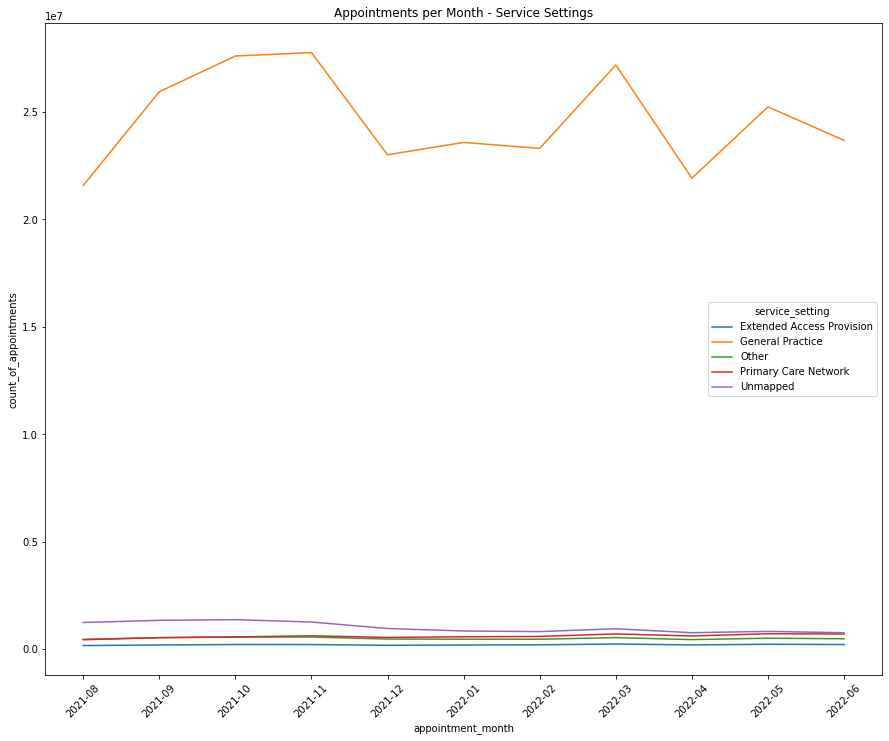

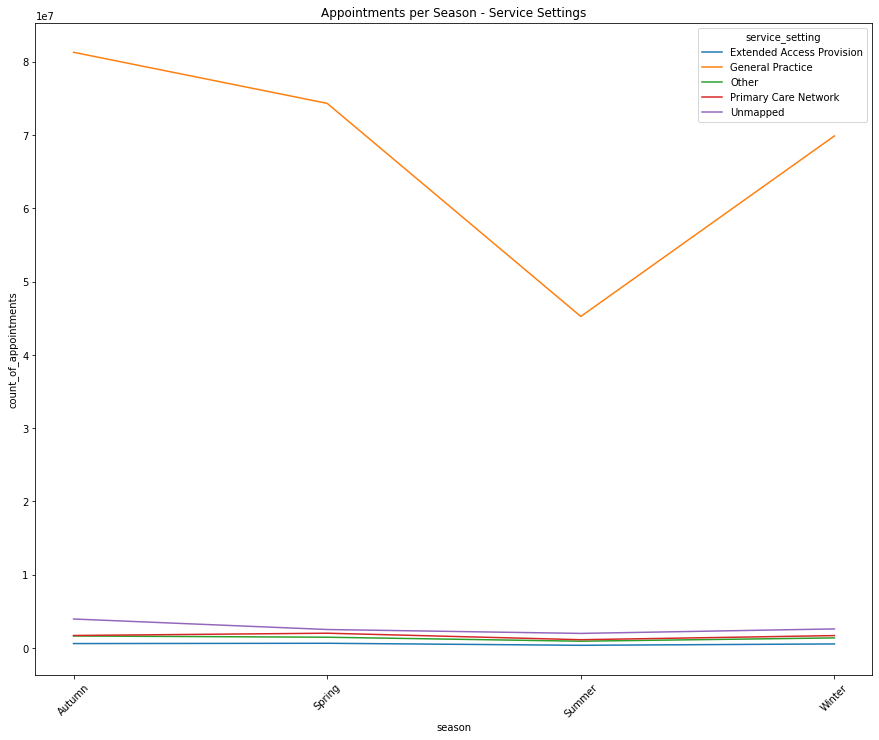

In [25]:
def create_lineplot(data, x_col, y_col, hue_col, title, filename):
    """
    Creates a line plot and saves it as a PNG file.

    Parameters:
    data (DataFrame): The dataframe containing the data to plot.
    x_col (str): The column name for the x-axis values.
    y_col (str): The column name for the y-axis values.
    hue_col (str): The column name for the hue (categorical data used to color the lines).
    title (str): The title for the plot.
    filename (str): The filename to save the plot as a PNG file.

    Returns:
    None: Displays the plot and saves it as a PNG file.
    """
    plt.figure(figsize=(15, 12))
    sns.lineplot(data=data, x=x_col, y=y_col, hue=hue_col)

    plt.title(title)
    plt.xticks(rotation=45)

    # Save the plot as PNG file
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()

# Example usage:
# Create and save a line plot for 'nc_ss' DataFrame
create_lineplot(nc_ss, 'appointment_month', 'count_of_appointments', 'service_setting', 'Appointments per Month - Service Settings', 'appointments_per_month_service_settings.png')

# Create and save a line plot for appointments per season for service settings
create_lineplot(nc_ss_season, 'season', 'count_of_appointments', 'service_setting', 'Appointments per Season - Service Settings', 'appointments_per_season_service_settings.png')


#### Spring and autumn have high demand, while summer dips and winter rises. NHS should adjust resources accordingly, reduce staff in summer, and focus on proactive campaigns. Use telemedicine for routine visits, run winter flu campaigns, and streamline urgent care. Implement predictive scheduling and allow winter pre-bookings to manage peak demand.

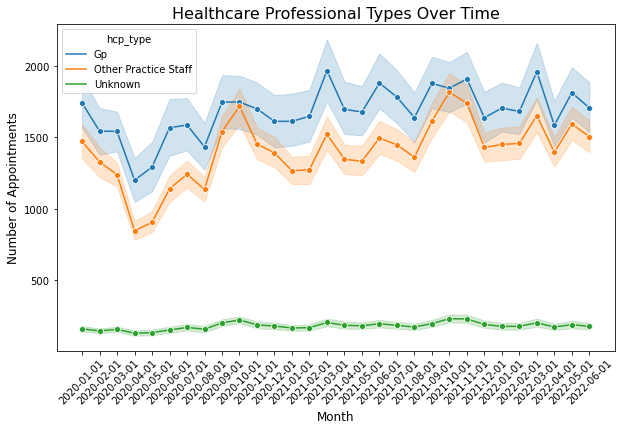

In [26]:
# Function to prepare and plot the line plot for healthcare professional types over time
def plot_hcp_type_trends(data):
    """
    This function plots the number of appointments per healthcare professional type over time.
    
    Parameters:
    data (DataFrame): The DataFrame containing the 'appointment_month', 'hcp_type', and 'count_of_appointments' columns.
    """
    
    # Convert 'appointment_month' to string for easier plotting
    data['appointment_month'] = data['appointment_month'].astype(str)
    
    # Create the lineplot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=data, marker='o')
    
    # Title and axis labels
    plt.title('Healthcare Professional Types Over Time', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Appointments', fontsize=12)  # Fixed the typo here
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

# Use lambda function to clean data or apply transformations if needed
ar['hcp_type'] = ar['hcp_type'].apply(lambda x: x.strip().title())  # Clean and standardize 'hcp_type' values

# Call the # Call the function to plot the data
plot_hcp_type_trends(ar)


#### The chart tracks the number of appointments for each healthcare professional type (hcp_type) over time, showing trends for each category by month. It allows for the identification of seasonality, fluctuations, and demand spikes for specific HCP types. By comparing trends, it can highlight which professionals are in higher demand. This information is useful for forecasting staffing needs and optimising resource allocation across healthcare services.

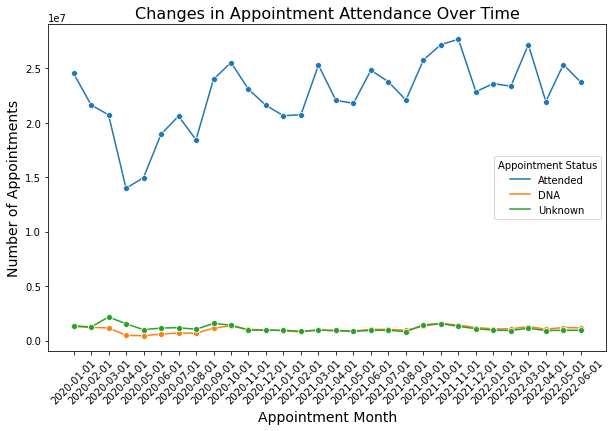

In [27]:
# Assuming 'ar' is the DataFrame containing the necessary data
# Function to plot lineplot for appointment attendance status over time
def plot_appointment_attendance(df):
    """
    This function plots the number of attended vs missed appointments over time.
    """
    # Group by 'appointment_month' and 'appointment_status' to count the number of appointments for each status
    attendance_data = df.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

    # Lineplot for appointment attendance status
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=attendance_data, marker='o')
    
    # Plot aesthetics
    plt.title('Changes in Appointment Attendance Over Time', fontsize=16)
    plt.xlabel('Appointment Month', fontsize=14)
    plt.ylabel('Number of Appointments', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Appointment Status')
    plt.show()

# Call the function to display the plot
plot_appointment_attendance(ar)



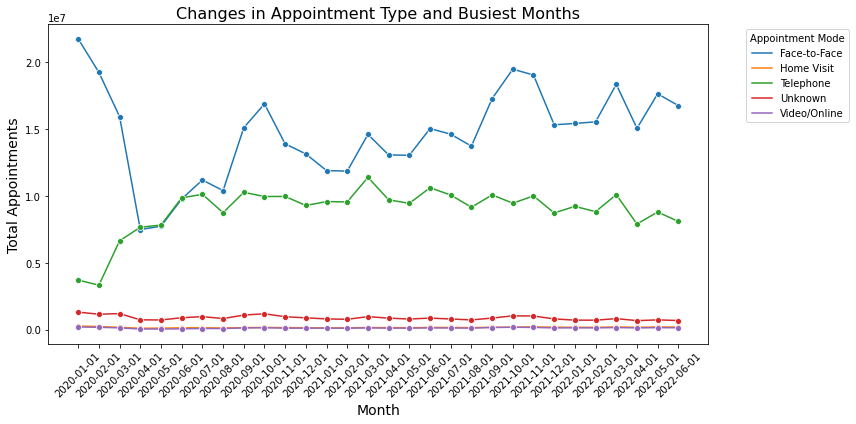

In [28]:
# Function to visualize busiest months based on appointment mode
def plot_busiest_months_by_mode(df):
    """
    This function generates a lineplot to visualize changes in appointment types 
    (appointment mode) over different months. It helps to identify busiest months 
    for each appointment mode (e.g., in-person, virtual).
    """
    # Group data by appointment_month and appointment_mode, summing up the count of appointments
    mode_monthly_data = df.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Create the lineplot for the appointment mode
    sns.lineplot(data=mode_monthly_data, x='appointment_month', y='count_of_appointments', hue='appointment_mode', marker='o')
    
    # Customize the plot
    plt.title('Changes in Appointment Type and Busiest Months', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Appointments', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function with the dataframe
plot_busiest_months_by_mode(ar)  # Assuming `ar` contains the necessary data


Insights.

1. Appointments per Month - Service Settings
Insights: Shows fluctuating demand for different service settings throughout the months. Some settings may have consistent demand, while others vary.

2. Appointments per Season - Service Settings
Insights: Reveals seasonal trends for service settings, with some settings peaking in specific seasons.






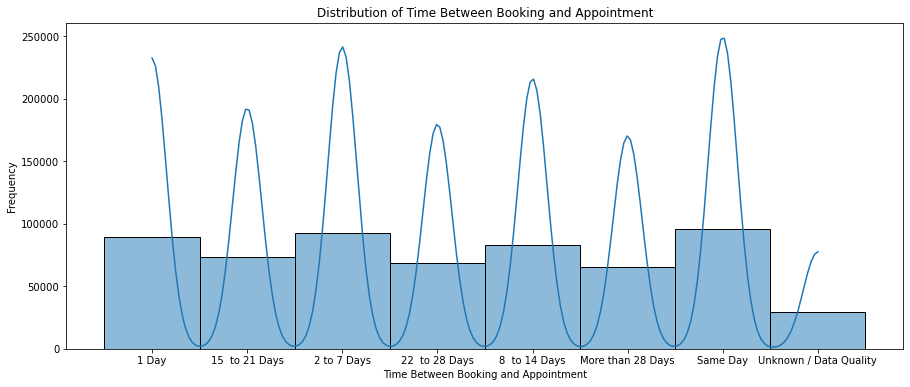

In [29]:
# Checking the distribution of 'time_between_book_and_appointment' (could be used for resource planning)
plt.figure(figsize=(15, 6))
sns.histplot(ar['time_between_book_and_appointment'], kde=True)
plt.title('Distribution of Time Between Booking and Appointment')
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Frequency')
plt.show()

###### The same-day appointment booking being the highest suggests that a significant number of patients are scheduling appointments on short notice.
##### The 2-7 days category being the second-highest indicates that many patients are still booking with relatively short lead times.
##### The 8-14 days and 1 day categories having similar numbers suggest that patients are scheduling with varying degrees of foresight but still not far in advance. 
##### The least number of appointments in the unknown/date quality category suggests that most appointment dates are being recorded correctly.

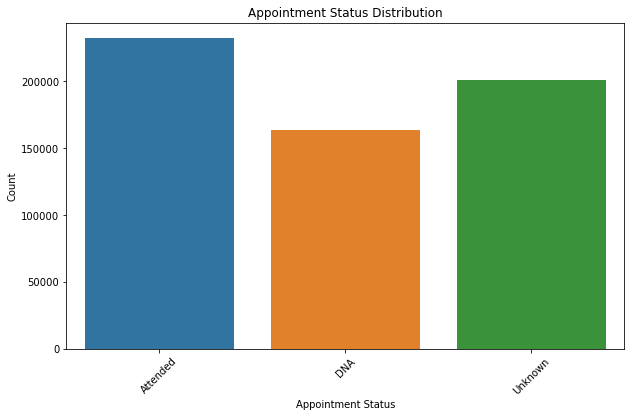

In [30]:
# Appointment status distribution (to check the missed vs completed appointments)
plt.figure(figsize=(10, 6))
sns.countplot(x='appointment_status', data=ar)
plt.title('Appointment Status Distribution')
plt.xlabel('Appointment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### The Attended bar is the highest, indicates that most appointments are being kept, which is a positive sign of patient engagement and system efficiency.The DNA bar at 15,000 represents a sizable portion of missed appointments, suggesting room for improvement in patient attendance and engagement. The unknown bar  might indicate a lack of clarity in appointment status, which could be due to issues in data tracking or communication, or appointments where the status was not recorded properly.


#### Total appointments by region
##### As the region names are lengthy, I will use the Region codes instead in this visualisation, so for convenience, I will first display the Region names with the respective codes for a better user interface.

In [31]:

region_code_map = dict(zip(ad['sub_icb_location_name'], ad['region_ons_code']))
region_code_table = pd.DataFrame({"Region": region_code_map.keys(), "Region Code": region_code_map.values()}).reset_index(drop=True)

In [32]:
region_code_table

,Region,Region Code
0,NHS North East and North Cumbria ICB - 00L,E40000012
1,NHS North East and North Cumbria ICB - 00N,E40000012
2,NHS North East and North Cumbria ICB - 00P,E40000012
3,NHS Lancashire and South Cumbria ICB - 00Q,E40000010
4,NHS Lancashire and South Cumbria ICB - 00R,E40000010
...,...,...
101,NHS Hampshire and Isle Of Wight ICB - D9Y0V,E40000005
102,NHS Bedfordshire Luton and Milton Keynes ICB -...,E40000007
103,NHS Shropshire Telford and Wrekin ICB - M2L0M,E40000011
104,NHS North West London ICB - W2U3Z,E40000003


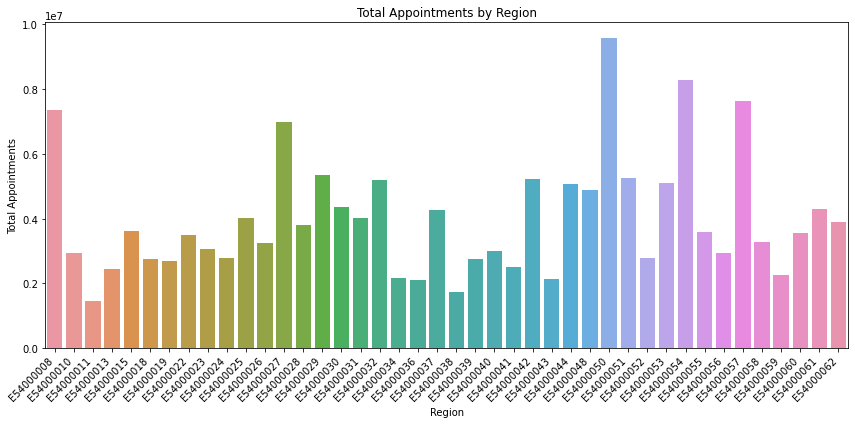

In [33]:
# Grouping the data by 'icb_ons_code' (assuming it represents regions) and summing the appointments
def group_appointments_by_region(df):
    """
    Groups the given dataframe by 'icb_ons_code' and sums the 'count_of_appointments' 
    for each region. Returns a new dataframe with regions and their corresponding total appointments.
    
    Parameters:
    df (DataFrame): The dataframe containing the appointment data.
    
    Returns:
    DataFrame: A dataframe with regions and their total appointments.
    """
    region_appointments = df.groupby('icb_ons_code')['count_of_appointments'].sum().reset_index()
    return region_appointments

# Renaming columns for clarity
def rename_columns(df):
    """
    Renames the columns of the dataframe to more descriptive names for clarity.
    
    Parameters:
    df (DataFrame): The dataframe with region and total appointments data.
    
    Returns:
    DataFrame: The dataframe with renamed columns.
    """
    df.columns = ['Region', 'Total Appointments']
    return df

# Plotting the bar chart for total appointments by region
def plot_region_appointments(df):
    """
    Plots a bar chart to visualize the total appointments by region.
    
    Parameters:
    df (DataFrame): The dataframe containing the region and total appointments data.
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Region', y='Total Appointments')
    plt.xticks(rotation=45, ha='right')
    plt.title('Total Appointments by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Appointments')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'ad' is your dataframe
region_appointments = group_appointments_by_region(ad)
region_appointments = rename_columns(region_appointments)
plot_region_appointments(region_appointments)


##### This chart shows that E54000050, which is the NHS North East and North Cumbria , has the highest number of appointments.
##### The least is E54000011, which is NHS Shropshire Telford and Wrekin.


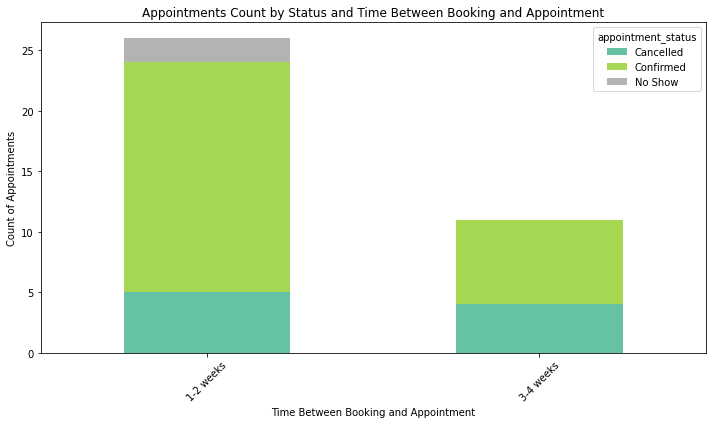

In [34]:


def plot_appointments_by_status(df):
    """
    Creates a stacked bar chart of appointments counts by status and time between booking and appointment.
    The chart is sorted by the total number of appointments in descending order.

    Parameters:
    df (DataFrame): The dataset containing appointment details, with columns for 'appointment_status', 
                    'time_between_booking_and_appointment', and 'count_of_appointments'.
    """
    # Pivot, sort, and plot in one go
    df.pivot_table(index='time_between_booking_and_appointment', 
                   columns='appointment_status', 
                   values='count_of_appointments', 
                   aggfunc='sum', 
                   fill_value=0) \
        .assign(Total=lambda x: x.sum(axis=1)) \
        .sort_values('Total', ascending=False) \
        .drop('Total', axis=1) \
        .plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set2')

    plt.title('Appointments Count by Status and Time Between Booking and Appointment')
    plt.xlabel('Time Between Booking and Appointment')
    plt.ylabel('Count of Appointments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage (you can replace this with your actual DataFrame)
df = pd.DataFrame({
    'appointment_status': ['Confirmed', 'Cancelled', 'Confirmed', 'No Show', 'Confirmed', 'Cancelled'],
    'time_between_booking_and_appointment': ['1-2 weeks', '1-2 weeks', '3-4 weeks', '1-2 weeks', '1-2 weeks', '3-4 weeks'],
    'count_of_appointments': [10, 5, 7, 2, 9, 4]
})

# Call the function with the DataFrame
plot_appointments_by_status(df)



##### The chart reveals that most appointments are confirmed, with smaller portions of cancellations and no-shows. Shorter time intervals between booking and appointments seem more common, indicating urgency or efficient scheduling. Seasonal peaks may exist, reflecting higher demand at specific times. The data also suggests areas to improve in reducing cancellations and no-shows.

###  How do the various service settings compare?

#### A bar plot will clearly display the number of appointments for each service setting, making it easy to compare them side by side.
It's effective for comparing multiple categories (service settings) over time.

### Insights:
Service Setting Trends: The bar plot will show how appointments are distributed across different service settings (e.g., GP, outpatient, etc.). This could help identify if some service settings are being overused or underutilised.

Seasonality: The bar plot may highlight peaks and valleys in appointments for certain service settings. This could indicate seasonal fluctuations in demand or the need for more staff in specific settings during busy months.



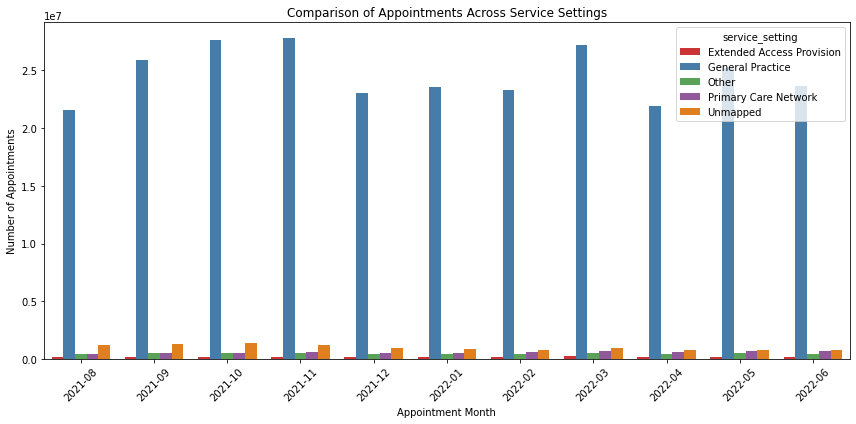

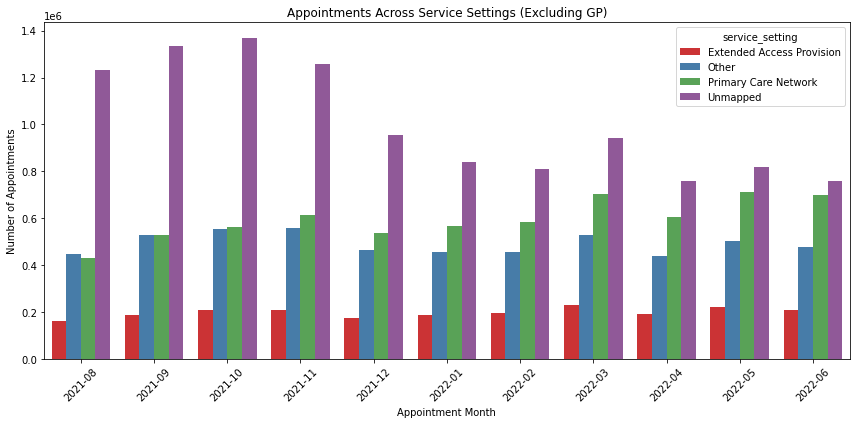

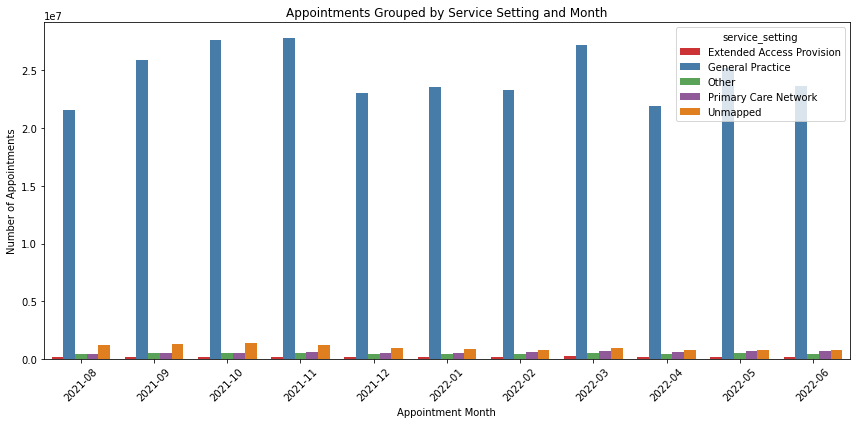

In [35]:
# First Visualisation: Appointments by service setting
def plot_appointments_by_service_setting(service_settings):
    """
    This function creates and displays a bar plot comparing the number of appointments
    across different service settings (e.g., GP, clinic, etc.) over time (appointment months).
    
    Parameters:
    service_settings (DataFrame): The data containing appointment information, including service settings.
    """
    plt.figure(figsize=(12, 6))  # Create a new figure for the plot
    sns.barplot(data=service_settings, x='appointment_month', y='count_of_appointments', hue='service_setting', palette='Set1')
    plt.title('Comparison of Appointments Across Service Settings')
    plt.xlabel('Appointment Month')
    plt.ylabel('Number of Appointments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Second Visualisation: Appointments excluding GP
def plot_appointments_excluding_gp(service_settings):
    """
    This function creates and displays a bar plot comparing the number of appointments
    across different service settings, excluding GP, over time (appointment months).
    
    Parameters:
    service_settings (DataFrame): The data containing appointment information, including service settings.
    """
    service_settings_no_gp = service_settings[service_settings['service_setting'] != 'General Practice']
    plt.figure(figsize=(12, 6))  # Create a new figure for the plot
    sns.barplot(data=service_settings_no_gp, x='appointment_month', y='count_of_appointments', hue='service_setting', palette='Set1')
    plt.title('Appointments Across Service Settings (Excluding GP)')
    plt.xlabel('Appointment Month')
    plt.ylabel('Number of Appointments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Third Visualisation: Grouping and comparing service settings (Group by appointment month)
def plot_appointments_grouped_by_service_setting(service_settings):
    """
    This function creates and displays a bar plot comparing the number of appointments
    across different service settings, grouped by appointment month.
    
    Parameters:
    service_settings (DataFrame): The data containing appointment information, including service settings.
    """
    plt.figure(figsize=(12, 6))  # Create a new figure for the plot
    appointments_grouped = service_settings.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()
    sns.barplot(data=appointments_grouped, x='appointment_month', y='count_of_appointments', hue='service_setting', palette='Set1')
    plt.title('Appointments Grouped by Service Setting and Month')
    plt.xlabel('Appointment Month')
    plt.ylabel('Number of Appointments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the functions to display the three plots
plot_appointments_by_service_setting(nc_ss)
plot_appointments_excluding_gp(nc_ss)
plot_appointments_grouped_by_service_setting(nc_ss)


##### GP appointments dominate, with consistently higher numbers, indicating heavy demand compared to other services.

##### Non-GP services have lower and stable appointment numbers, with "unknown" services showing data gaps.


###### GP appointments show seasonal trends, while other settings are more consistent with low variability.


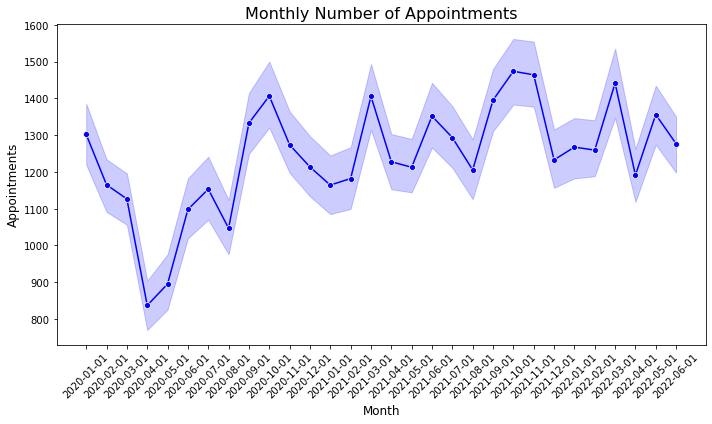

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'appointment_month' is treated as a string for better plotting
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

def plot_monthly_appointments(df):
    """
    Plots the number of appointments per month.

    Parameters:
    df (DataFrame): The dataframe containing 'appointment_month' and 'count_of_appointments'.

    Returns:
    None: Displays a line plot showing the number of appointments each month.
    """
    # Plot the number of appointments per month
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='appointment_month', y='count_of_appointments', data=df, marker='o', color='blue')
    
    # Set plot titles and labels
    plt.title('Monthly Number of Appointments', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Appointments', fontsize=12)
    
    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45)
    
    # Adjust layout to avoid overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Call the function to plot the number of appointments
plot_monthly_appointments(ar_df)



### Analysis of twitter data to inform the viability of future investment

### Top trending hashtags

In [37]:
# Example of the top 10 hashtags, including potential duplicates
top_hashtags = pd.Series({
    "#healthcare": 599,
    "#Healthcare": 198,
    "#health": 68,
    "#HealthCare": 47,
    "#AI": 45,
    "#medicine": 42,
    "#job": 38,
    "#strategy": 31,
    "#medical": 30,
    "#MedTwitter": 25
})

# Standardizing similar hashtags (case insensitive, grouping related ones)
standardized_hashtags = {
    "Health-Related": ["#healthcare", "#Healthcare", "#HealthCare", "#health", "#medicine", "#medical"],
    "AI-Related": ["#AI"],
    "Job-Related": ["#job"],
    "Strategy-Related": ["#strategy"],
    "Social Media": ["#MedTwitter"]
}

# Creating a new dictionary to store the total counts for each group
grouped_counts = {}

# Summing the counts for each group
for category, hashtags in standardized_hashtags.items():
    # Summing the count of all hashtags within each category
    total_count = sum([top_hashtags.get(hashtag, 0) for hashtag in hashtags])
    grouped_counts[category] = total_count

# Convert the grouped counts into a DataFrame for better presentation
grouped_hashtags_df = pd.DataFrame(list(grouped_counts.items()), columns=['Category', 'Total Count'])

# Styling the table with a colourful gradient based on the values
styled_table = grouped_hashtags_df.style.background_gradient(cmap='Spectral', axis=0).set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
    {'selector': 'td', 'props': [('color', 'black'), ('font-size', '12pt')]}
])

# Display the colourful table
display(styled_table)


,Category,Total Count
0,Health-Related,984
1,AI-Related,45
2,Job-Related,38
3,Strategy-Related,31
4,Social Media,25


### Visualisation of the trending Hashtags

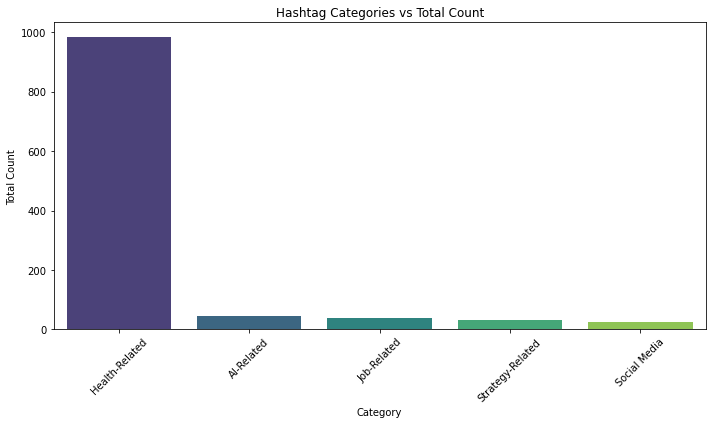

In [38]:
# Create the DataFrame with the given data
# This dataset contains categories and their corresponding total counts
data = {
    'Category': ['Health-Related', 'AI-Related', 'Job-Related', 'Strategy-Related', 'Social Media'],
    'Total Count': [984, 45, 38, 31, 25]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Plot the data using seaborn's barplot
# This will create a bar chart where the x-axis is the categories and the y-axis is the total counts
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Category', y='Total Count', data=df, palette='viridis')

# Customize the plot
# Set the title of the plot
plt.title('Hashtag Categories vs Total Count')

# Set the labels for the x and y axes
plt.xlabel('Category')
plt.ylabel('Total Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Adjust the layout to prevent label clipping
plt.tight_layout()

# Display the plot
plt.show()


#### The majority of the conversations are health-related. There’s a clear focus on health topics, with emerging interest in AI and social media's role in healthcare.